In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

pd.options.display.max_columns= 40



In [3]:
# Decide if this is run on colab or local machine
local=True


In [4]:
if not local:
    from google.colab import files
    uploaded = files.upload()

In [5]:
# https://www.drivendata.org/competitions/57/nepal-earthquake/data/


if local:
    df_test_competition = pd.read_csv("../data/test_values.csv")
    df_train_labels = pd.read_csv("../data/train_labels.csv")
    df_train_values = pd.read_csv("../data/train_values.csv")
    df_submiss_format = pd.read_csv("../data/submission_format.csv")
else:
    import io

    df_train_values = pd.read_csv(io.StringIO(uploaded["train_values.csv"].decode('utf-8')), sep = ",")
    df_train_labels = pd.read_csv(io.StringIO(uploaded["train_labels.csv"].decode('utf-8')), sep = ",")
    df_test_competition = pd.read_csv(io.StringIO(uploaded["test_values.csv"].decode('utf-8')), sep = ",")
    df_submiss_format = pd.read_csv(io.StringIO(uploaded["submission_format.csv"].decode('utf-8')), sep = ",")

    

The definition of columns is explained at this web page:
https://www.drivendata.org/competitions/57/nepal-earthquake/page/136/

In [6]:
print(df_train_values.shape)
df_train_values.head(3)

(260601, 39)


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [7]:
print(df_train_labels.shape)
df_train_labels.head()

(260601, 2)


,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [8]:
print(df_test.shape)
df_test.head()

(86868, 39)


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


#### Preliminaries
- check data types
- check missing values
- check..?

#### Check data types

In [22]:
df_train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [173]:
# Since a lot of the features are categorical
def get_categorical_variables():
    categorical_variables = [
        'building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'land_surface_condition', 'foundation_type', 'roof_type',
        'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status', 
    ]
    return categorical_variables[:]

def get_binary_variables():
    binary_variables = [
        'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
        'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
        'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other',
        'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel',
        'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry',
        'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other', 
   ]
    return binary_variables[:]

def get_numeric_variables():
    # List of numeric variables:
    numeric_variables =  ["count_floors_pre_eq", "age", "area_percentage", "height_percentage", "count_families"  ]
    return numeric_variables[:]


def cast_dtypes(df, float_variables=list(), categorical_variables=list(), binary_variables=list()):
    df = df.copy()
    df = (
        df
        .astype({name: "float64" for name in float_variables})
        .astype({name: "str" for name in categorical_variables})
        .astype({name: "int32" for name in binary_variables})
    )
    return df

def combine_features_and_label(data_values, data_labels):
    train_set = (
        pd.merge(data_values, data_labels, how="left", on=["building_id"])
        .drop(columns=["building_id"])
    )
    return train_set

In [203]:
categorical_variables = get_categorical_variables()
numeric_variables = get_numeric_variables()
binary_variables = get_binary_variables()

df_train_values = (
    cast_dtypes(df=df_train_values, 
                float_variables=numeric_variables, 
                categorical_variables=categorical_variables,
                binary_variables=binary_variables)
)

df_train_labels = (
    cast_dtypes(df=df_train_labels,
                float_variables=["damage_grade"],
               categorical_variables=["building_id"])
)
df_train_values.head(2)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2.0,30.0,6.0,5.0,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1.0,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2.0,10.0,8.0,7.0,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1.0,0,0,0,0,0,0,0,0,0,0,0


In [204]:
total_set = (
    combine_features_and_label(data_values=df_train_values,
                              data_labels=df_train_labels)
)

train_set["damage_grade"].head(4)

0    3.0
1    2.0
2    3.0
3    2.0
Name: damage_grade, dtype: float64

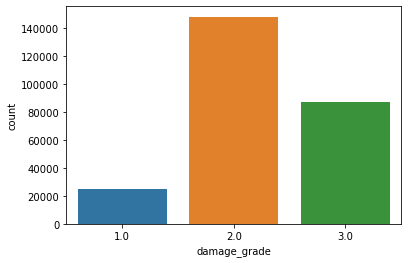

In [176]:
sns.countplot(train_set["damage_grade"])

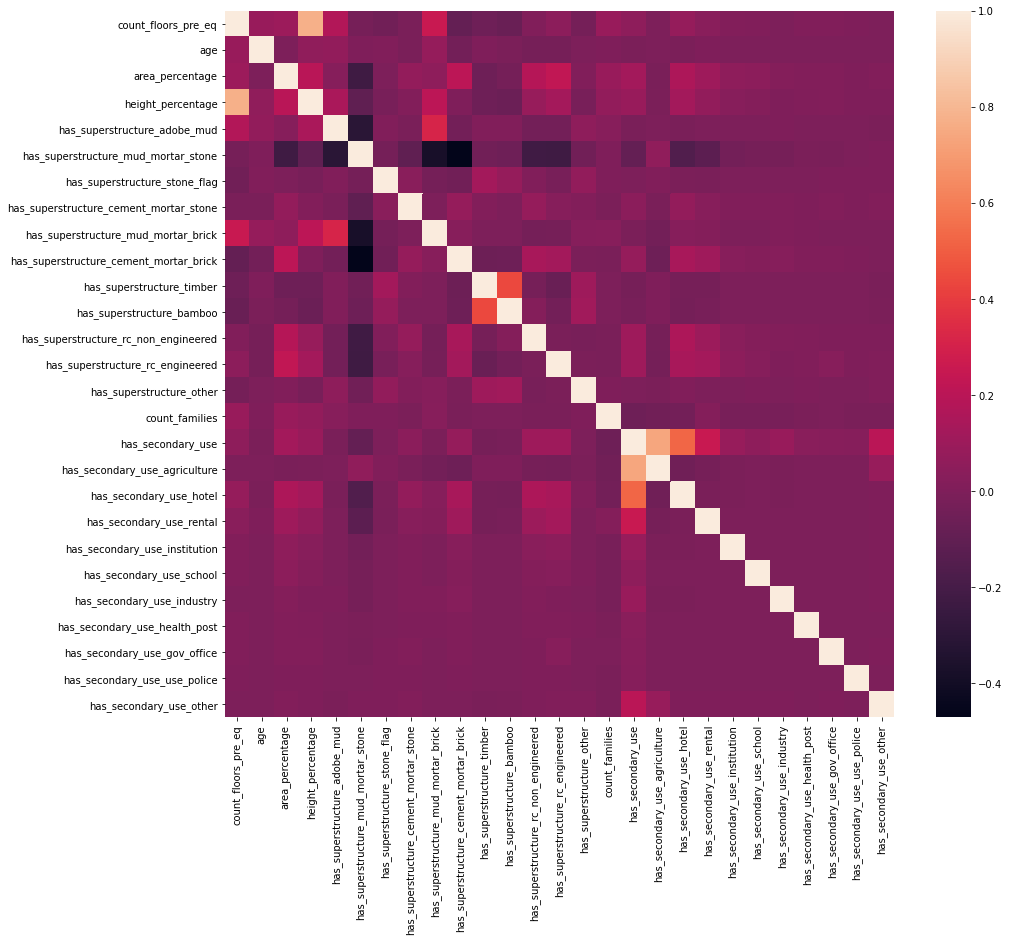

In [201]:
plt.figure(figsize=(15,13))
data_corr = train_set.drop(columns=["damage_grade"]).corr()
sns.heatmap(data_corr)
plt.show();

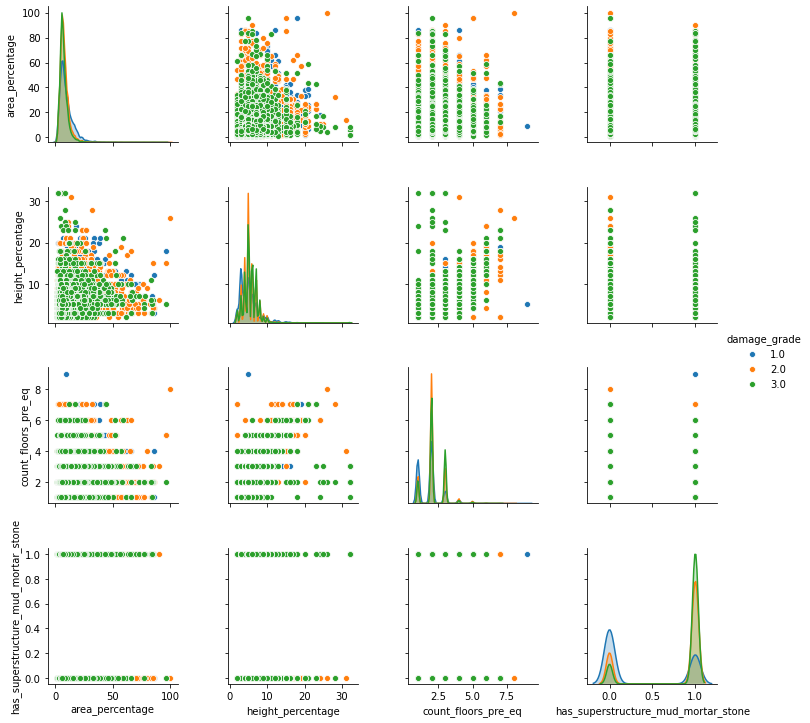

In [186]:
import seaborn as sns
#https://www.kaggle.com/jaylaksh94/model-for-nepal-earthquake-damage
selected_features = ['foundation_type', 
                     'area_percentage', 
                     'height_percentage',
                     'count_floors_pre_eq',
                     'land_surface_condition',
                     'has_superstructure_mud_mortar_stone',
                      'damage_grade']

train_values_subset = train_set[selected_features].copy()

sns.pairplot(train_values_subset, 
             hue='damage_grade')

In [205]:
selected_cat_variables =  ["has_superstructure_mud_mortar_stone"]

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_set.drop(columns=["damage_grade"]), train_set["damage_grade"], test_size=0.8, random_state=42)

In [222]:
from sklearn.preprocessing import StandardScaler
X_train_numeric = X_train[numeric_variables]

stand_scaler = StandardScaler()
stand_scaler.fit(X_train_numeric)
X_train_numeric = stand_scaler.transform(X_train_numeric)

In [223]:
X_train_cat = X_train[selected_cat_variables]

In [224]:
X_train_prep = np.concatenate([X_train_numeric, X_train_cat], axis=1)


#### Train phase


In [229]:
log_regres = LogisticRegression(multi_class="ovr")

log_regres.fit(X=X_train_prep, y=y_train)

LogisticRegression(multi_class='ovr')

#### Test phase

In [230]:
X_test_numeric = X_test[numeric_variables]
X_test_numeric = stand_scaler.transform(X_test_numeric)
X_test_cat = X_test[selected_cat_variables]
X_test_prep = np.concatenate([X_test_numeric, X_test_cat], axis=1)

df_test = pd.DataFrame(y_test)
df_test["y_pred"] = log_regres.predict(X_test_prep)


In [231]:
from sklearn.metrics import accuracy_score, f1_score

print(f"Overall, unweighted accuracy score: {accuracy_score(y_true=df_test['damage_grade'], y_pred=df_test['y_pred'])}")

Overall, unweighted accuracy score: 0.5688000345355212


In [232]:
# f1_score = https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html:
#  F1 = 2 * (precision * recall) / (precision + recall) --> between 0 and 1
# precision = tp/(tp + fp)
# recall = tp/(tp + fn)

print(f'f1_score: {f1_score(y_true=df_test["damage_grade"], y_pred=df_test["y_pred"], average="micro")}')

f1_score: 0.5688000345355212


In [233]:

X, X_test, y, y_test = train_test_split(train_set, train_set["damage_grade"], test_size=0.8, random_state=42)

#### Now with cross-validation

In [235]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split


X, X_test, y, y_test = train_test_split(train_set, train_set["damage_grade"], test_size=0.8, random_state=42)
skf = StratifiedKFold(n_splits=3, shuffle=False, random_state=None)


for train_index, test_index in skf.split(X, y):
    X_train, X_validation = X.iloc[train_index], X.iloc[test_index]   
    y_train, y_validation = y.iloc[train_index], y.iloc[test_index]
    
    # preprocessing
    X_train_numeric = X_train[numeric_variables]
    stand_scaler = StandardScaler()
    stand_scaler.fit(X_train_numeric)
    X_train_numeric = stand_scaler.transform(X_train_numeric)
    X_train_cat = X_train[selected_cat_variables]
    X_train_prep = np.concatenate([X_train_numeric, X_train_cat], axis=1)

    
    # fitting
    log_regres = LogisticRegression(multi_class="ovr")
    log_regres.fit(X=X_train_prep, y=y_train)
    
    # predicting 
    X_validation_numeric = X_validation[numeric_variables]
    X_validation_numeric = stand_scaler.transform(X_validation_numeric)
    X_validation_cat = X_validation[selected_cat_variables]
    X_validation_prep = np.concatenate([X_validation_numeric, X_validation_cat], axis=1)
    
    df_test = pd.DataFrame(y_validation, columns=["damage_grade"])
    df_test["y_pred"] = log_regres.predict(X_validation_prep)

    # see score for this iteration
    print(f'f1_score: {f1_score(y_true=df_test["damage_grade"], y_pred=df_test["y_pred"], average="micro")}')


f1_score: 0.5694716242661448
f1_score: 0.5696770851321016
f1_score: 0.5689287975594313


Now with actually trying to see what parameters may work

In [239]:
l2_regularization = [.01, .1, 1, 10, 100, 100000]



In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(train_set, train_set["damage_grade"], test_size=0.8, random_state=42)
skf = StratifiedKFold(n_splits=3, shuffle=False, random_state=None)

for c_ in l2_regularization:
    print(f"Starting fit for c_: {c_}")
    for train_index, test_index in skf.split(X, y):
        X_train, X_validation = X.iloc[train_index], X.iloc[test_index]   
        y_train, y_validation = y.iloc[train_index], y.iloc[test_index]

        # preprocessing
        X_train_numeric = X_train[numeric_variables]
        stand_scaler = StandardScaler()
        stand_scaler.fit(X_train_numeric)
        X_train_numeric = stand_scaler.transform(X_train_numeric)
        X_train_cat = X_train[selected_cat_variables]
        X_train_prep = np.concatenate([X_train_numeric, X_train_cat], axis=1)


        # fitting
        log_regres = LogisticRegression(C=c_, multi_class="ovr")
        log_regres.fit(X=X_train_prep, y=y_train)

        # predicting 
        X_validation_numeric = X_validation[numeric_variables]
        X_validation_numeric = stand_scaler.transform(X_validation_numeric)
        X_validation_cat = X_validation[selected_cat_variables]
        X_validation_prep = np.concatenate([X_validation_numeric, X_validation_cat], axis=1)

        df_test = pd.DataFrame(y_validation, columns=["damage_grade"])
        df_test["y_pred"] = log_regres.predict(X_validation_prep)

        # see score for this iteration
        print(f'f1_score: {f1_score(y_true=df_test["damage_grade"], y_pred=df_test["y_pred"], average="micro")}')


Starting fit for c_: 0.01
f1_score: 0.5693565097271786
f1_score: 0.5695044033845622
f1_score: 0.5688136763944052
Starting fit for c_: 0.1
f1_score: 0.5694716242661448
f1_score: 0.5696770851321016
f1_score: 0.5689287975594313
Starting fit for c_: 1
f1_score: 0.5694716242661448
f1_score: 0.5696770851321016
f1_score: 0.5689287975594313
Starting fit for c_: 10
f1_score: 0.5695291815356279
f1_score: 0.5696195245495884
f1_score: 0.5688712369769182
Starting fit for c_: 100
f1_score: 0.5695291815356279
f1_score: 0.5696195245495884
f1_score: 0.5688712369769182
Starting fit for c_: 100000
f1_score: 0.5695291815356279
f1_score: 0.5696195245495884
f1_score: 0.5688712369769182


In [241]:
# df_test[numeric_variables] = df_test[numeric_variables].astype("float64")

# competition_prediction = df_test[["building_id"]].astype("str")

# competition_prediction = competition_prediction.assign(
#     damage_grade=log_regres.predict(df_test[numeric_variables])
# )
# competition_prediction["damage_grade"].plot.hist()

##### It seems I could have reached a similar performance by guessing everything to be a 2, so it seems to perform as well as our guessing baseline

##### Printing the csv to make an actual prediction

In [ ]:
competition_prediction.to_csv("submission_v1.csv", index=False)

In [ ]:
if not local:
    files.download("submission_v1.csv")